In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('..')

In [5]:
import os
import random
from glob import glob
import cv2
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import cleanup_etci_data, get_etci_df, visualize_image_and_masks, grayscale_to_rgb

In [6]:
project_root = '/Users/akerke/Documents/stacked-unets'
output_dir = os.path.join(project_root,'output')
labels_dir = os.path.join(project_root,'output_xs', 'etci_labels')
labels_dir = os.path.join(project_root,'output', 'etci_labels')

In [7]:
train_dir = os.path.join(project_root,'dataset', 'data-etci-flood','train')

In [10]:
labels_dir

'/Users/akerke/Documents/stacked-unets/output/etci_labels'

In [11]:
config.SAMPLE_IMAGES

['bangladesh_20170606t115613_x-33_y-29',
 'bangladesh_20170314t115609_x-11_y-20',
 'nebraska_20171210t002119_x-13_y-28',
 'nebraska_20170731t002118_x-9_y-26',
 'nebraska_20170731t002118_x-10_y-14',
 'northal_20191227t234659_x-9_y-9',
 'northal_20190407t234651_x-19_y-18',
 'northal_20190712t234656_x-5_y-25',
 'bangladesh_20170606t115613_x-23_y-15']

In [12]:
original_df = get_etci_df(train_dir, split="train")
original_df = cleanup_etci_data(original_df)
original_df = original_df.reset_index(drop=True)

In [13]:
original_df.head()

,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region,semantic_map_prev_level
0,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,
1,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,
2,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,
3,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,
4,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,


In [14]:
def generate_prediction_paths(n_levels, images):
    prediction_paths = []
    for image_name in images:                       
        for level in range(n_levels):
            prediction_path = f"semantic_map_level_{level}_image_{image_name}.png"
            prediction_paths.append(prediction_path)
    return prediction_paths

In [15]:
def get_image_folder(image_name):
    relevant_parts = image_name.split("_")[:2]
    return "_".join(relevant_parts)

In [16]:
def generate_label_paths(images, train_dir, n_levels):
    vv_image_paths, vh_image_paths, flood_label_paths, water_body_label_paths, semantic_map_paths = [], [], [], [], []
    for image in images:
        vv_image_paths.append(f"{train_dir}/{get_image_folder(image)}/tiles/vv/{image}_vv.png")
        vh_image_paths.append(f"{train_dir}/{get_image_folder(image)}/tiles/vh/{image}_vh.png")
        water_body_label_paths.append(f"{train_dir}/{get_image_folder(image)}/tiles/water_body_label/{image}.png")
        flood_label_paths.append(f"{train_dir}/{get_image_folder(image)}/tiles/flood_label/{image}.png")
        semantic_map_paths.append(f"{labels_dir}/semantic_map_level_{n_levels-1}_image_{image}.png")
    return vv_image_paths, vh_image_paths, flood_label_paths, water_body_label_paths, semantic_map_paths

In [17]:
# vv_image_paths, vh_image_paths, flood_label_paths, water_body_label_paths, semantic_map_paths = \
# generate_label_paths(images=EXAMPLES, train_dir=train_dir, n_levels=2)
# paths = {
#         "vv_image_path": vv_image_paths,
#         "vh_image_path": vh_image_paths,
#         "flood_label_path": flood_label_paths,
#         "water_body_label_path": water_body_label_paths,
#         "semantic_map_prev_level": semantic_map_paths,
#     }

In [18]:
# df = pd.DataFrame(paths)

In [19]:
from src.utils import get_image_name_from_path, get_image_name_from_semantic_path

def fill_original_dataframe(df, labels_dir, n_levels):
    for index, df_row in df.iterrows():
        image = get_image_name_from_path(df_row["vv_image_path"])
        semantic_map_path = f"{labels_dir}/semantic_map_level_{n_levels-1}_image_{image}.png"
        df.at[index, "semantic_map_prev_level"] = semantic_map_path
    return df


In [20]:
fill_original_dataframe(original_df, labels_dir, n_levels=5)

,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region,semantic_map_prev_level
0,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,/Users/akerke/Documents/stacked-unets/output/e...
1,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,/Users/akerke/Documents/stacked-unets/output/e...
2,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,/Users/akerke/Documents/stacked-unets/output/e...
3,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,/Users/akerke/Documents/stacked-unets/output/e...
4,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,bangladesh,/Users/akerke/Documents/stacked-unets/output/e...
...,...,...,...,...,...,...
25019,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,northal,/Users/akerke/Documents/stacked-unets/output/e...
25020,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,northal,/Users/akerke/Documents/stacked-unets/output/e...
25021,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,northal,/Users/akerke/Documents/stacked-unets/output/e...
25022,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,/Users/akerke/Documents/stacked-unets/dataset/...,northal,/Users/akerke/Documents/stacked-unets/output/e...


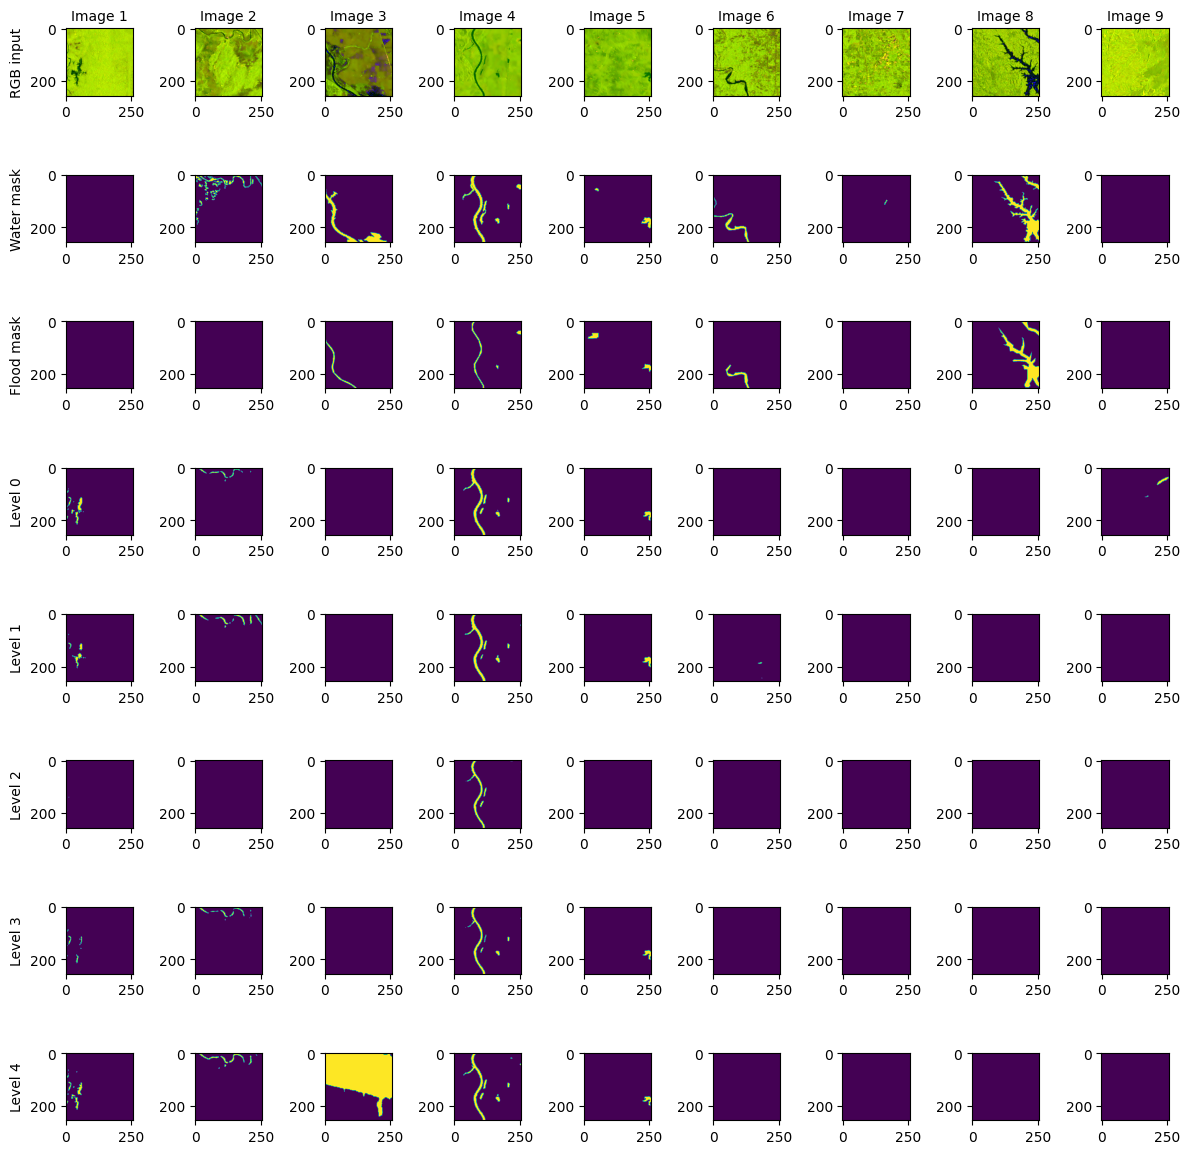

In [21]:
from src.utils import visualize_prediction

visualize_prediction(images_list=config.SAMPLE_IMAGES, updated_df=original_df, n_levels=5)

In [1]:
def calculate_iou(mask_pred, mask_true, smooth=0.0001):
    intersection = np.logical_and(mask_true, mask_pred)
    union = np.logical_or(mask_true, mask_pred)
    iou_score = (np.sum(intersection) + smooth) / (np.sum(union) + smooth)
    return iou_score

In [8]:
actual_1 = np.array([[0, 0, 1], [0, 1, 1], [2, 2, 0]])
predicted_1 = np.array([[0, 0, 1], [0, 0, 1], [2, 2, 0]])

actual_2 = np.array([[1, 0, 0], [2, 1, 0], [2, 2, 1]])
predicted_2 = np.array([[1, 0, 0], [2, 2, 0], [2, 2, 1]])

predictions = [predicted_1, predicted_2]
references = [actual_1, actual_2]

In [9]:
iou_scores = []

for pred, ref in zip(predictions, references):
    iou_score = calculate_iou(pred, ref)
    iou_scores.append(iou_score)

print("IoU scores: ", iou_scores)
print("mean IoU score: ", np.mean(iou_scores))

IoU scores:  [0.8000039999200016, 1.0]
mean IoU score:  0.9000019999600009


In [10]:
from src.evaluate import IntersectionOverUnion

iou_metric = IntersectionOverUnion(num_classes=2)

for pred, ref in zip(predictions, references):
    iou_metric.update(pred, ref)


print(f"conf: {iou_metric.conf_matrix}")
print(f"size: {iou_metric.count}")


mean_iou_score = iou_metric.mean_iou()
print(f"Mean IoU Score: {mean_iou_score}")

conf: [[7 0]
 [1 4]]
size: 18
Mean IoU Score: 0.8374865314783553
